In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchsummary import summary 

## About Dataset

The dataset contains the images of both healthy and diseases of plants, the motive is to find wether plant is healthy or it is infected.

Folder structure:
1. For Disease plants : name of plant___disease
2. For health plants : name of plant___healthy

It contains Train and valid folders

In [4]:
train_path = '../Datsets/Imgs/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '../Datsets/Imgs/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

total_classes = os.listdir(train_path)

In [5]:
total_classes

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

In [6]:
print('Total number of classes :' ,len(total_classes))

Total number of classes : 38


In [7]:
plants = []
NumberOfDiseases = 0
for plant in total_classes:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(plants,'\n')
print('Total number of plants :',len(plants),'\n')
print('Total number of diseases :',NumberOfDiseases)

['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry'] 

Total number of plants : 14 

Total number of diseases : 26


In [8]:
# Number of images for each class
nums = {}

for disease in total_classes:
    nums[disease] = len(os.listdir(train_path + '/' + disease))
    
nums

{'Tomato___Late_blight': 1851,
 'Tomato___healthy': 1926,
 'Grape___healthy': 1692,
 'Orange___Haunglongbing_(Citrus_greening)': 2010,
 'Soybean___healthy': 2022,
 'Squash___Powdery_mildew': 1736,
 'Potato___healthy': 1824,
 'Corn_(maize)___Northern_Leaf_Blight': 1908,
 'Tomato___Early_blight': 1920,
 'Tomato___Septoria_leaf_spot': 1745,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642,
 'Strawberry___Leaf_scorch': 1774,
 'Peach___healthy': 1728,
 'Apple___Apple_scab': 2016,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1961,
 'Tomato___Bacterial_spot': 1702,
 'Apple___Black_rot': 1987,
 'Blueberry___healthy': 1816,
 'Cherry_(including_sour)___Powdery_mildew': 1683,
 'Peach___Bacterial_spot': 1838,
 'Apple___Cedar_apple_rust': 1760,
 'Tomato___Target_Spot': 1827,
 'Pepper,_bell___healthy': 1988,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722,
 'Potato___Late_blight': 1939,
 'Tomato___Tomato_mosaic_virus': 1790,
 'Strawberry___healthy': 1824,
 'Apple___healthy': 2008,
 'Gra

Text(0.5, 1.0, 'Images per each class of plant disease')

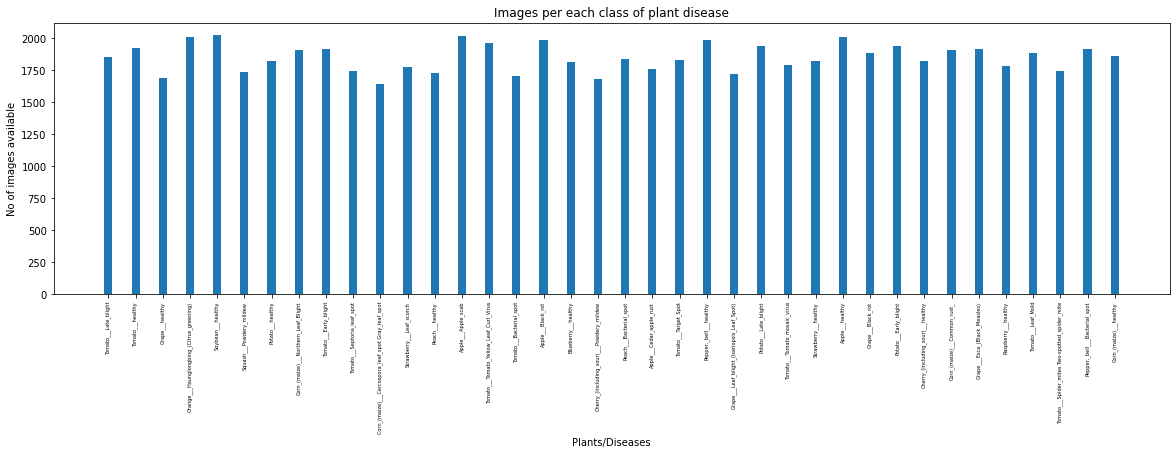

In [9]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, total_classes, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [10]:
nums_train = {}
for disease in total_classes:
    nums_train[disease] = len(os.listdir(train_path + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
img_per_class_train

no. of images
Tomato___Late_blight                                         1851
Tomato___healthy                                             1926
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Potato___healthy                                             1824
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Early_blight                                        1920
Tomato___Septoria_leaf_spot                                  1745
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Strawberry___Leaf_scorch                                     1774
Peach___healthy                                              1728
Apple___Apple_scab                                           2016
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Bacterial_spot                                      1702
Apple___Black_rot                                            1987
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Peach___Bacterial_spot                                       1838
Apple___Cedar_apple_rust                                     1760
Tomato___Target_Spot                                         1827
Pepper,_bell___healthy                                       1988
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___Late_blight                                         1939
Tomato___Tomato_mosaic_virus                                 1790
Strawberry___healthy                                         1824
Apple___healthy                                              2008
Grape___Black_rot                                            1888
Potato___Early_blight                                        1939
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Raspberry___healthy                                          1781
Tomato___Leaf_Mold                                           1882
Tomato___Spider_mites Two-spotted_spider_mite                1741
Pepper,_bell___Bacterial_spot                                1913
Corn_(maize)___healthy                                       1859

In [11]:
nums_valid = {}
for disease in total_classes:
    nums_valid[disease] = len(os.listdir(valid_path + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class_valid = pd.DataFrame(nums_valid.values(), index=nums_valid.keys(), columns=["no. of images"])
img_per_class_valid

no. of images
Tomato___Late_blight                                          463
Tomato___healthy                                              481
Grape___healthy                                               423
Orange___Haunglongbing_(Citrus_greening)                      503
Soybean___healthy                                             505
Squash___Powdery_mildew                                       434
Potato___healthy                                              456
Corn_(maize)___Northern_Leaf_Blight                           477
Tomato___Early_blight                                         480
Tomato___Septoria_leaf_spot                                   436
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Strawberry___Leaf_scorch                                      444
Peach___healthy                                               432
Apple___Apple_scab                                            504
Tomato___Tomato_Yellow_Leaf_Curl_Virus                        490
Tomato___Bacterial_spot                                       425
Apple___Black_rot                                             497
Blueberry___healthy                                           454
Cherry_(including_sour)___Powdery_mildew                      421
Peach___Bacterial_spot                                        459
Apple___Cedar_apple_rust                                      440
Tomato___Target_Spot                                          457
Pepper,_bell___healthy                                        497
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                    430
Potato___Late_blight                                          485
Tomato___Tomato_mosaic_virus                                  448
Strawberry___healthy                                          456
Apple___healthy                                               502
Grape___Black_rot                                             472
Potato___Early_blight                                         485
Cherry_(including_sour)___healthy                             456
Corn_(maize)___Common_rust_                                   477
Grape___Esca_(Black_Measles)                                  480
Raspberry___healthy                                           445
Tomato___Leaf_Mold                                            470
Tomato___Spider_mites Two-spotted_spider_mite                 435
Pepper,_bell___Bacterial_spot                                 478
Corn_(maize)___healthy                                        465

In [12]:
train_count = 0
for value in nums_train.values():
    train_count += value
print("There are {} images for training".format(train_count))

There are 70295 images for training


In [13]:
valid_count = 0
for value in nums_valid.values():
    valid_count += value
print("There are {} images for training".format(valid_count))

There are 17572 images for training


## Prepeartion of data

In [14]:
# datasets for validation and training
train_ds = ImageFolder(train_path, transform=transforms.ToTensor())
valid_ds = ImageFolder(valid_path, transform=transforms.ToTensor()) 

## Distribution

In [15]:
img, label = train_ds[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


image is of size 256x256 is size of the image and 3 is the number of channels (RGB)

In [16]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train_ds.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


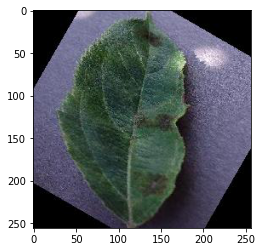

In [17]:
show_image(*train_ds[18])

Label :Peach___Bacterial_spot(16)


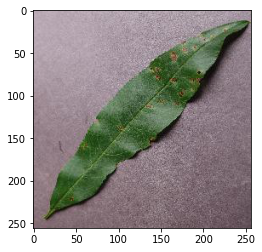

In [18]:
show_image(*train_ds[30000])

In [19]:
random_seed = 8
torch.manual_seed(random_seed)

batch_size = 32

# DataLoaders for training and validation
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=3, pin_memory=True)

In [20]:
# helper function to show a batch of training instances
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

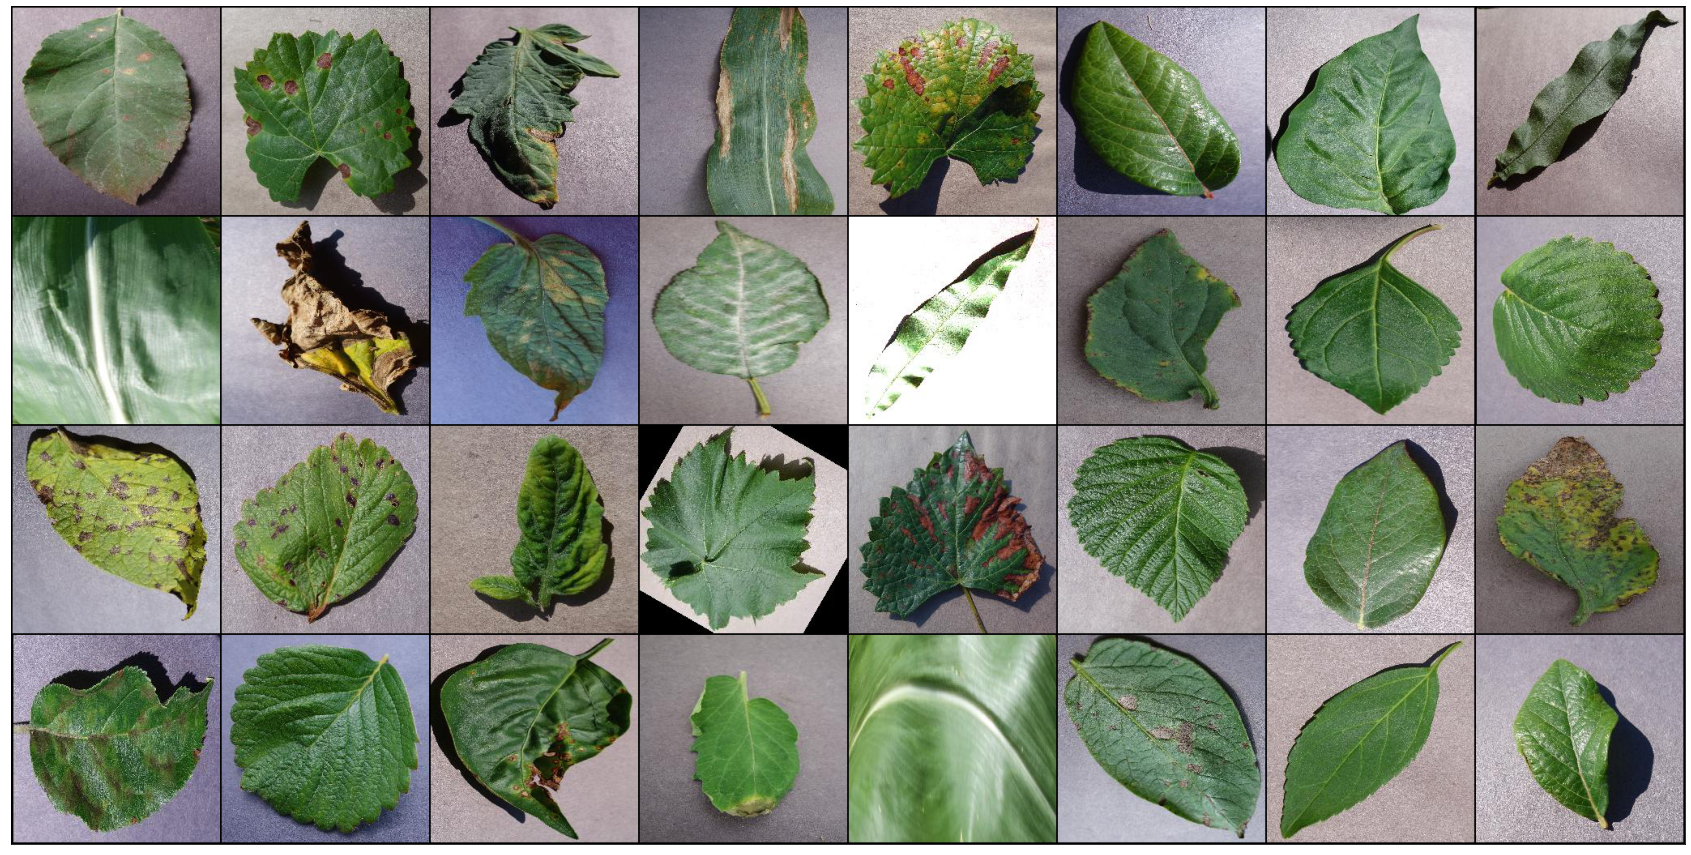

In [21]:
show_batch(train_dl)

### Checking Device

In [22]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [23]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available).

In [24]:
train_ddl = DeviceDataLoader(train_dl, device)
valid_ddl = DeviceDataLoader(valid_dl, device)

### Architecture

We are going to use ResNet.

The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layers.
This also helps in preventing vanishing gradient problem and allow us to train deep neural networks.

In [26]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [28]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

In [30]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out   

In [31]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train_ds.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [32]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

### Training

In [33]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
 

In [34]:
# checking validation loss and accuracy
%%time
history = [evaluate(model, valid_ddl)]
history

CPU times: user 45.5 s, sys: 4.57 s, total: 50.1 s
Wall time: 1min 11s


[{'val_loss': tensor(3.6390, device='cuda:0'), 'val_accuracy': tensor(0.0331)}]

The accuracy was 3.31%, as random weights were assigned.

### Assigned values

In [35]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [36]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_ddl, valid_ddl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 0.7356, val_loss: 0.7064, val_acc: 0.8007
Epoch [1], last_lr: 0.00000, train_loss: 0.1245, val_loss: 0.0256, val_acc: 0.9920
CPU times: user 14min 29s, sys: 9min 26s, total: 23min 55s
Wall time: 24min 54s


Accuracy is around 99.2%

Let's plot the valdation set accuracies to study how the model improves over time.

In [37]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

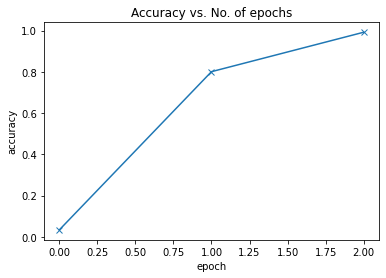

In [38]:
plot_accuracies(history)

We can also plot the training and validation losses to study the trend.

In [39]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

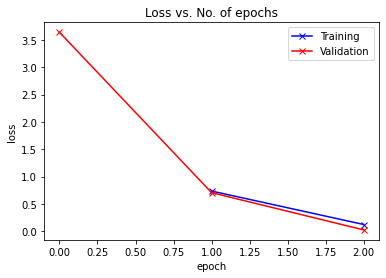

In [40]:
plot_losses(history)

Finally, let's visualize how the learning rate changed over time, batch-by-batch over all the epochs.

In [41]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

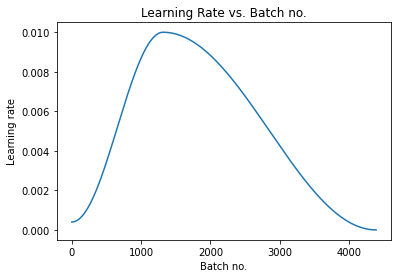

In [42]:
plot_lrs(history)

# Testing with individual images

There is a test dir with 33 diff images to test

In [43]:
test_dir = "../Datasets/Imgs/test/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [44]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [45]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train_ds.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


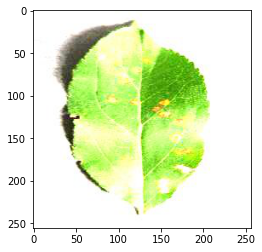

In [46]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [47]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


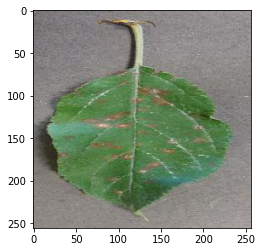

In [48]:
img, label = test[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


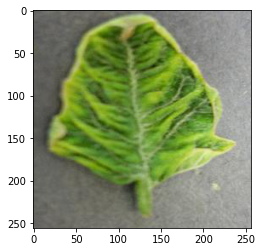

In [50]:
img, label = test[32]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

## Saving the Model

saving the models 'state_dict' using 'torch.save'

In [51]:
# saving to the working directory
loc = '../Models/plant-disease-model.pth'  
torch.save(model.state_dict(), loc)

Ref: https://medium.com/swlh/natural-image-classification-using-resnet9-model-6f9dc924cd6d